In [1]:
import jax
import jax.numpy as jnp
import jax.random as jr
import jax.tree_util as jtu
from diffrax import (
    ALIGN,
    diffeqsolve,
    Euler,
    LangevinTerm,
    SaveAt,
    ShOULD,
    SORT,
    SpaceTimeTimeLevyArea,
    UBU3,
    VirtualBrownianTree,
)
from drawing_and_evaluating import plot_sol_langevin


x0 = {
    "a": (jnp.ones((2,)), jnp.ones((2,)), jnp.ones((2,))),
    "b": (
        jnp.ones((5,)),
        jnp.ones((3,)),
    ),
}
v0 = {
    "a": (jnp.zeros((2,)), jnp.zeros((2,)), jnp.zeros((2,))),
    "b": (
        jnp.zeros((5,)),
        jnp.zeros((3,)),
    ),
}
y0 = (x0, v0)

g1 = {
    "a": 0.5 * jnp.ones((2,)),
    "b": (
        jnp.ones(()),
        jnp.ones((3,)),
    ),
}

u1 = {"a": (jnp.ones(()), 1000.0, jnp.ones((2,))), "b": jnp.ones(())}


def grad_f(x):
    xa = x["a"]
    xb = x["b"]
    return {"a": jtu.tree_map(lambda _x: 0.2 * _x, xa), "b": xb}


args = g1, u1, grad_f

vbt_shape = jtu.tree_map(lambda _x: jax.ShapeDtypeStruct(_x.shape, _x.dtype), x0)

vbt = VirtualBrownianTree(0.0, 1.0, 0.001, vbt_shape, jr.key(0), SpaceTimeTimeLevyArea)

lt = LangevinTerm(args, vbt, x0)

In [3]:
from test.helpers import get_pytree_langevin


sde = get_pytree_langevin(0.0, 1.0)
vbt = sde.get_bm(jr.key(0), SpaceTimeTimeLevyArea, 0.01)
print(vbt.shape)
print(vbt.evaluate(0.0, 0.33, use_levy=True))

{'a': (ShapeDtypeStruct(shape=(2,), dtype=float32), ShapeDtypeStruct(shape=(2,), dtype=float32), ShapeDtypeStruct(shape=(2,), dtype=float32)), 'b': (ShapeDtypeStruct(shape=(5,), dtype=float32), ShapeDtypeStruct(shape=(3,), dtype=float32))}
SpaceTimeTimeLevyArea(
  dt={'a': (f32[], f32[], f32[]), 'b': (f32[], f32[])},
  W={'a': (f32[2], f32[2], f32[2]), 'b': (f32[5], f32[3])},
  H={'a': (f32[2], f32[2], f32[2]), 'b': (f32[5], f32[3])},
  K={'a': (f32[2], f32[2], f32[2]), 'b': (f32[5], f32[3])}
)


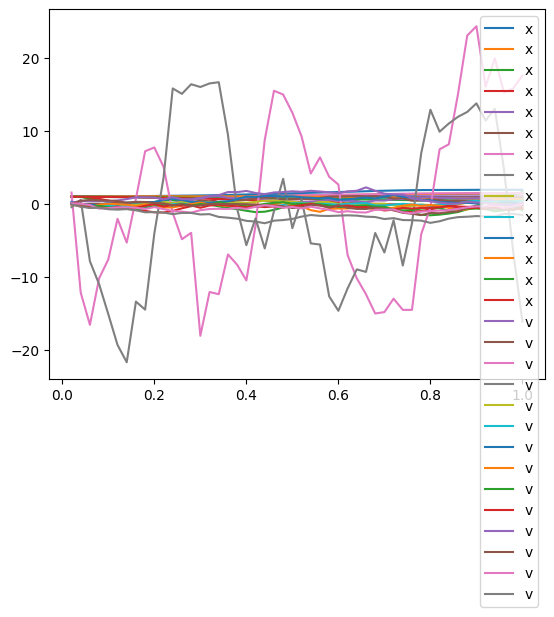

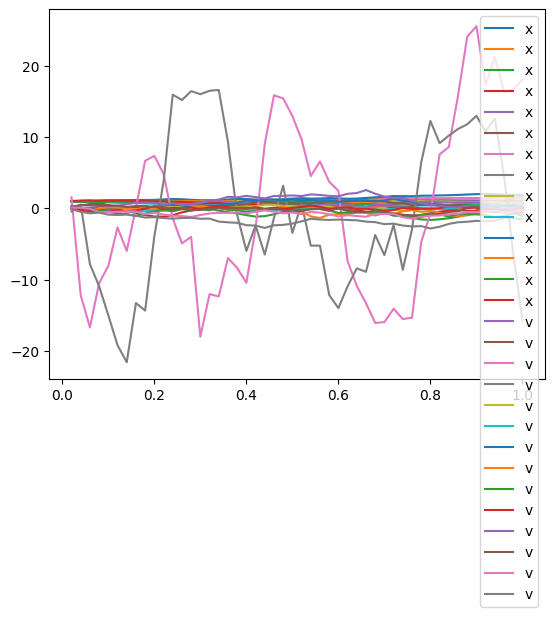

In [2]:
sol_ShOULD_tay = diffeqsolve(
    lt, ShOULD(100.0), 0.0, 1.0, 0.02, y0, None, saveat=SaveAt(steps=True)
)
sol_ShOULD_direct = diffeqsolve(
    lt, ShOULD(0.0), 0.0, 1.0, 0.02, y0, None, saveat=SaveAt(steps=True)
)
plot_sol_langevin(sol_ShOULD_tay)
plot_sol_langevin(sol_ShOULD_direct)

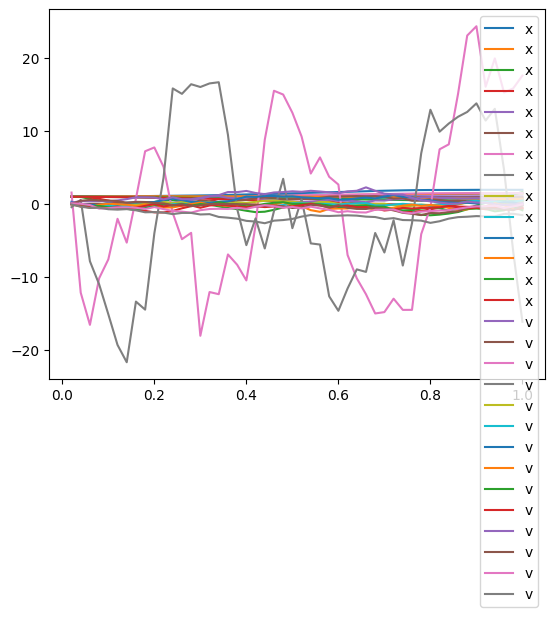

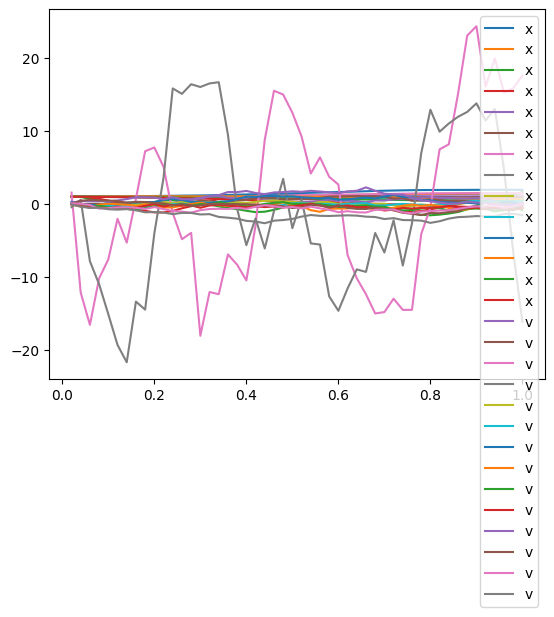

In [3]:
sol_SORT_tay = diffeqsolve(
    lt, SORT(100.0), 0.0, 1.0, 0.02, y0, None, saveat=SaveAt(steps=True)
)
sol_SORT_direct = diffeqsolve(
    lt, SORT(0.0), 0.0, 1.0, 0.02, y0, None, saveat=SaveAt(steps=True)
)
plot_sol_langevin(sol_SORT_tay)
plot_sol_langevin(sol_SORT_direct)

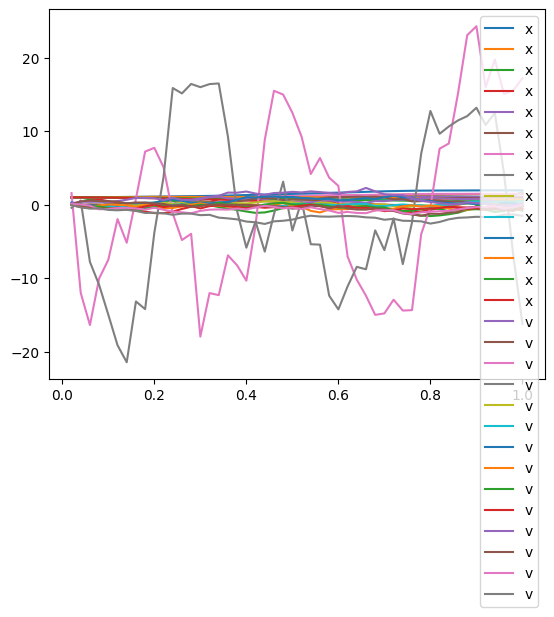

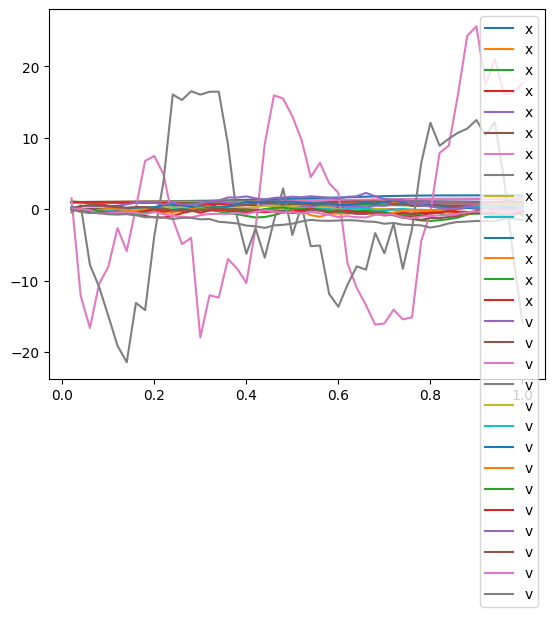

In [2]:
sol_ALIGN_tay = diffeqsolve(
    lt, ALIGN(100.0), 0.0, 1.0, 0.02, y0, None, saveat=SaveAt(steps=True)
)
sol_ALIGN_direct = diffeqsolve(
    lt, ALIGN(0.0), 0.0, 1.0, 0.02, y0, None, saveat=SaveAt(steps=True)
)
plot_sol_langevin(sol_ALIGN_tay)
plot_sol_langevin(sol_ALIGN_direct)

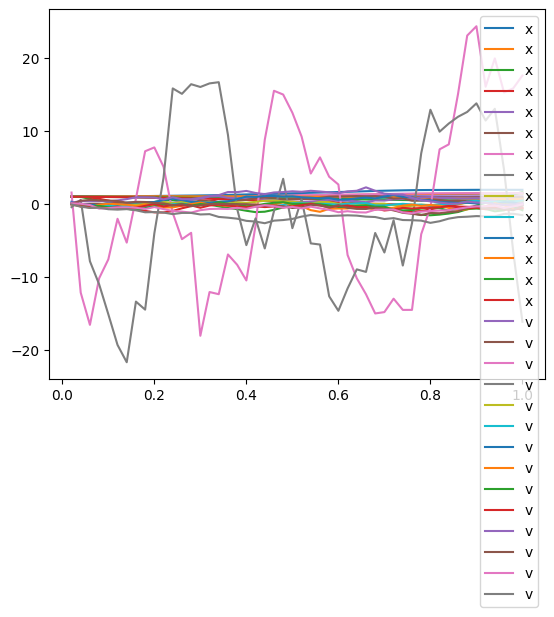

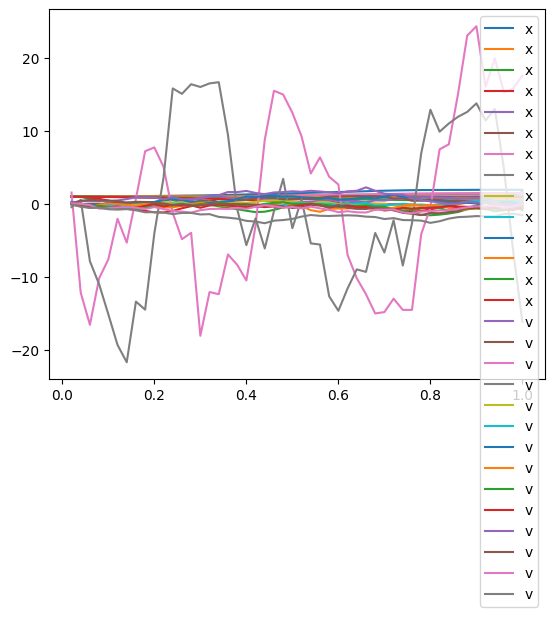

In [4]:
sol_UBU3_tay = diffeqsolve(
    lt, UBU3(100.0), 0.0, 1.0, 0.02, y0, None, saveat=SaveAt(steps=True)
)
sol_UBU3_direct = diffeqsolve(
    lt, UBU3(0.0), 0.0, 1.0, 0.02, y0, None, saveat=SaveAt(steps=True)
)
plot_sol_langevin(sol_UBU3_tay)
plot_sol_langevin(sol_UBU3_direct)

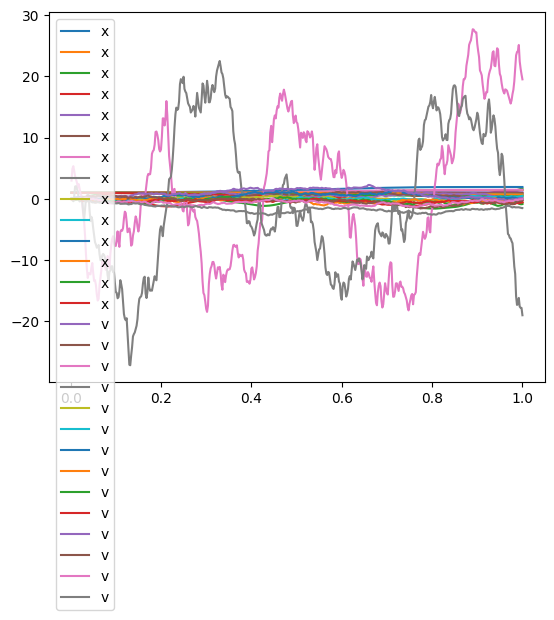

In [12]:
sol = diffeqsolve(lt, Euler(), 0.0, 1.0, 0.002, y0, None, saveat=SaveAt(steps=True))
plot_sol_langevin(sol)